# Временные ряды - модель плавающего окна

Анализ временного ряда (акций) с помощью Pandas

## Загрузка библиотек

In [20]:
# показать pandas_datareader (библиотека чтения данных)
!pip show pandas_datareader

Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.10/dist-packages
Requires: lxml, pandas, requests
Required-by: 


In [21]:
# обновить, если версия меньше 0.10
!pip install --upgrade pandas_datareader

In [22]:
import pandas as pd # работа с табличными данными (DataFrame)
from pandas import Series, DataFrame # объекты работы с данными
import numpy as np # библиотека математических функций

import datetime # работа со временем
import pandas_datareader.data as web # библиотека чтения данных

%matplotlib inline
import matplotlib.pyplot as plt # визуализация данных
from matplotlib import style  # стиль визуализации данных

plt.rcParams["figure.figsize"] = (10,5) # размер графиков
plt.style.use('fivethirtyeight') # стиль графиков, альтернативный style.use('ggplot')

In [23]:
start = datetime.datetime(2023, 5, 3) # Дата начала 22.06.2023, 03.05.2023, 30.09.2023, минус 150 дней
end = datetime.datetime(2023, 9, 30) # Дата завершения  30.09.2003

In [24]:
start = datetime.datetime(2024, 4, 16) # Дата начала 13.09.2024, 16.04.2024, минус 150 дней
end = datetime.datetime(2024, 9, 13) # Дата завершения  16.04.2024

# Top 10 S&P 500 tickers
sp_10 = ('AAPL.US', 'MSFT.US', 'AMZN.US', 'GOOGL.US', 'GOOG.US', 'TSLA.US', 'NVDA.US', 'BRK-B.US', 'FB.US', 'UNH.US')

In [25]:
web?

In [26]:
# Акции Амазона на бирже stooq
# Подробнее https://www.quantstart.com/articles/an-introduction-to-stooq-pricing-data/
COMPANY_STOCKS_NAME = "AMZN"
STOCKS_SOURCE = 'stooq'
df = web.DataReader(COMPANY_STOCKS_NAME, STOCKS_SOURCE, start, end)
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2024-04-22,176.94,178.87,174.56,177.23,37924890
2024-04-19,178.74,179.00,173.44,174.62,55944410
2024-04-18,181.47,182.39,178.65,179.22,30723793
2024-04-17,184.31,184.57,179.82,181.28,31359673
2024-04-16,183.27,184.83,182.26,183.32,32891265


In [27]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-09-12,184.800,187.41,183.54,187.00,33622483
2024-09-11,180.095,184.99,175.73,184.52,42564698
2024-09-10,177.490,180.50,176.79,179.55,36233796
2024-09-09,174.530,175.85,173.51,175.40,29037362
2024-09-06,177.240,178.38,171.16,171.39,41466537


In [28]:
df.columns = [col.lower() for col in df.columns] # привести заголовки к нижнему регистру
df.index.name = df.index.name.lower() # привести заголовки к нижнему регистру
df.head()

,open,high,low,close,volume
date,,,,,
2024-09-12,184.800,187.41,183.54,187.00,33622483
2024-09-11,180.095,184.99,175.73,184.52,42564698
2024-09-10,177.490,180.50,176.79,179.55,36233796
2024-09-09,174.530,175.85,173.51,175.40,29037362
2024-09-06,177.240,178.38,171.16,171.39,41466537


Будем использовать цену закрытия (close), которая указывает конечную цену, по которой акции торгуются к концу дня.

In [29]:
df.drop(columns=['open', 'high', 'low', 'volume'], inplace=True) # удалим лишнее

In [30]:
df.head(15)

,close
date,
2024-09-12,187.00
2024-09-11,184.52
2024-09-10,179.55
2024-09-09,175.40
2024-09-06,171.39
2024-09-05,177.89
2024-09-04,173.33
2024-09-03,176.25
2024-08-30,178.50


## Изучение скользящего среднего (плавающее окно) и ставки доходности акций

В этом анализе используем два ключевых показателя: скользящее среднее (Rolling Mean) и ставка доходности (Return Rate).

In [31]:
close_px = df['close']
# Сдвиг окна на последние 100 дней (осторожно! в обычном случае брать не более 12)
df['roll_mean_2'] = df['close'].rolling(2).mean()
df.head(200)

,close,roll_mean_2
date,,
2024-09-12,187.00,NaN
2024-09-11,184.52,185.760
2024-09-10,179.55,182.035
2024-09-09,175.40,177.475
2024-09-06,171.39,173.395
...,...,...
2024-04-22,177.23,178.385
2024-04-19,174.62,175.925
2024-04-18,179.22,176.920


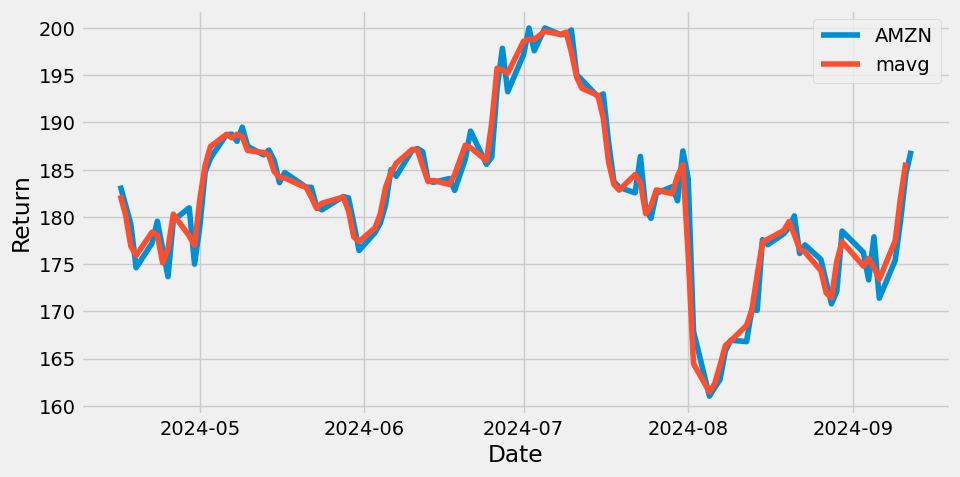

In [32]:
plt.plot(df['close'], label=COMPANY_STOCKS_NAME)
plt.plot(df['roll_mean_2'], label='mavg')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

Скользящая средняя делает линию плавной и демонстрирует тенденцию к увеличению или уменьшению цены акций.

На этом графике скользящая средняя демонстрирует тенденцию к росту или спаду цен на акции.

Работа с акциями: покупать, когда акции переживают спад, и продавать, когда акции переживают подъем

## Расширяющееся окно

 с каждым днем ​​мы получаем новую цену и еще одно ежедневное изменение, которое мы можем добавить к нашему среднему расчету

In [33]:
df

,close,roll_mean_2
date,,
2024-09-12,187.00,NaN
2024-09-11,184.52,185.760
2024-09-10,179.55,182.035
2024-09-09,175.40,177.475
2024-09-06,171.39,173.395
...,...,...
2024-04-22,177.23,178.385
2024-04-19,174.62,175.925
2024-04-18,179.22,176.920


In [34]:
# Расширяющееся окно
expand_w = df['close'].expanding(100).mean()

df['expand_mean']=df['close'].expanding(3).mean() # default 1
df['roll_mean_3']=df['close'].rolling(3).mean()
df.head(15)

,close,roll_mean_2,expand_mean,roll_mean_3
date,,,,
2024-09-12,187.00,NaN,NaN,NaN
2024-09-11,184.52,185.760,NaN,NaN
2024-09-10,179.55,182.035,183.690000,183.690000
2024-09-09,175.40,177.475,181.617500,179.823333
2024-09-06,171.39,173.395,179.572000,175.446667
2024-09-05,177.89,174.640,179.291667,174.893333
2024-09-04,173.33,175.610,178.440000,174.203333
2024-09-03,176.25,174.790,178.166250,175.823333
2024-08-30,178.50,177.375,178.203333,176.026667


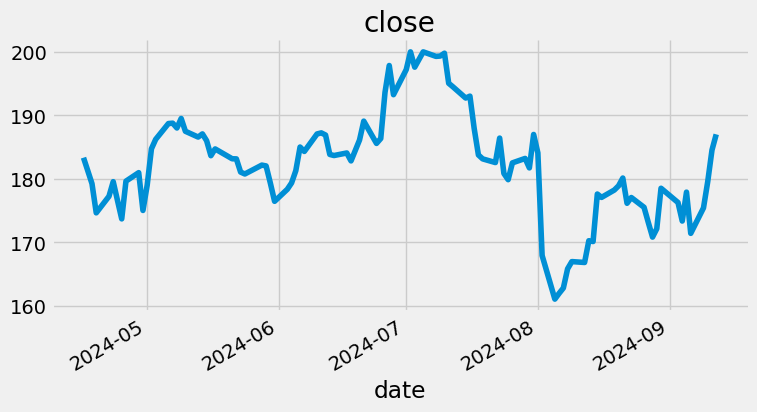

In [19]:
# @title close

from matplotlib import pyplot as plt
df['close'].plot(kind='line', figsize=(8, 4), title='close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [35]:
df.shape

(104, 4)

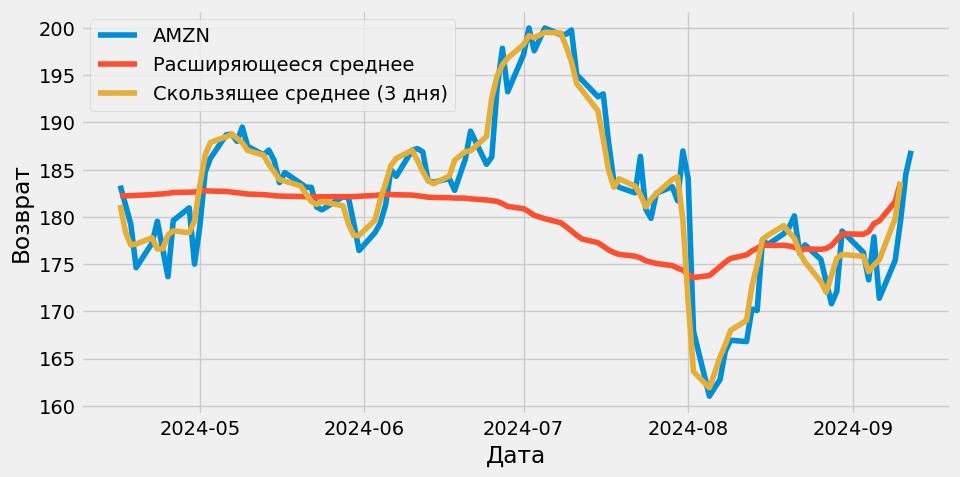

In [36]:
plt.plot(df['close'], label=COMPANY_STOCKS_NAME)
plt.plot(df['expand_mean'], label='Расширяющееся среднее')
plt.plot(df['roll_mean_3'], label='Скользящее среднее (3 дня)')
plt.xlabel('Дата')
plt.ylabel('Возврат')
plt.legend()
plt.show()

## Цена на акции

In [37]:
df['prev_price'] = df['close'].shift(1) # смещение цены закрытия на 1 (цена за предыдущий день)

In [39]:
df?

In [40]:
df[['close', 'prev_price']].head(10)

,close,prev_price
date,,
2024-09-12,187.00,NaN
2024-09-11,184.52,187.00
2024-09-10,179.55,184.52
2024-09-09,175.40,179.55
2024-09-06,171.39,175.40
2024-09-05,177.89,171.39
2024-09-04,173.33,177.89
2024-09-03,176.25,173.33
2024-08-30,178.50,176.25


In [41]:
df['daily_return'] = df['close']/df['prev_price']-1 # возврат за день
# разделить цену на prev_price и вычесть 1, чтобы получить дневную доходность

In [42]:
df[['close', 'prev_price', 'daily_return']].head(10)

,close,prev_price,daily_return
date,,,
2024-09-12,187.00,NaN,NaN
2024-09-11,184.52,187.00,-0.013262
2024-09-10,179.55,184.52,-0.026935
2024-09-09,175.40,179.55,-0.023113
2024-09-06,171.39,175.40,-0.022862
2024-09-05,177.89,171.39,0.037925
2024-09-04,173.33,177.89,-0.025634
2024-09-03,176.25,173.33,0.016846
2024-08-30,178.50,176.25,0.012766


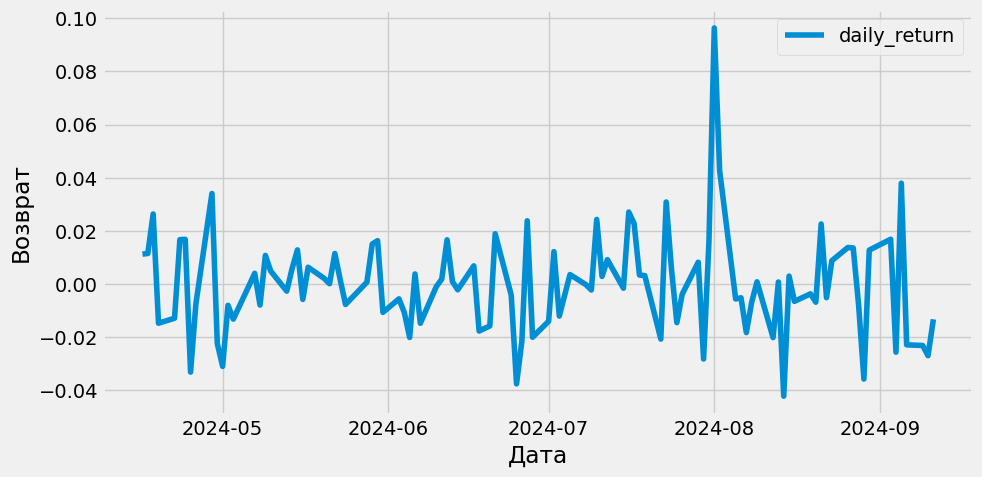

In [43]:
plt.plot(df['daily_return'], label="daily_return")
plt.xlabel('Дата')
plt.ylabel('Возврат')
plt.legend()
plt.show()

In [44]:
df['positive'] = df['daily_return'].apply(lambda x: 1 if x>0 else 0)

In [47]:
df[['daily_return', 'positive']].head(15)

,daily_return,positive
date,,
2024-09-12,NaN,0
2024-09-11,-0.013262,0
2024-09-10,-0.026935,0
2024-09-09,-0.023113,0
2024-09-06,-0.022862,0
2024-09-05,0.037925,1
2024-09-04,-0.025634,0
2024-09-03,0.016846,1
2024-08-30,0.012766,1


Когда у нас есть «положительный» столбец, мы можем применить к нему расширяющееся окно и метод sum (поскольку каждый положительный день обозначается 1, нам просто нужно сохранить текущую сумму из числа единиц)

Осторожно с суммой, применима в частных случаях

In [48]:
df['num_positive'] = df['positive'].expanding().sum()

In [49]:
df[['close', 'daily_return', 'positive', 'num_positive']].head(20)

,close,daily_return,positive,num_positive
date,,,,
2024-09-12,187.00,NaN,0,0.0
2024-09-11,184.52,-0.013262,0,0.0
2024-09-10,179.55,-0.026935,0,0.0
2024-09-09,175.40,-0.023113,0,0.0
2024-09-06,171.39,-0.022862,0,0.0
2024-09-05,177.89,0.037925,1,1.0
2024-09-04,173.33,-0.025634,0,1.0
2024-09-03,176.25,0.016846,1,2.0
2024-08-30,178.50,0.012766,1,3.0


In [51]:
df['num_positive'].max() # положительных дней для акции

51.0

## Волатильность акций
Изменение дисперсии доходности акций в течение определенного периода времени

 Обычно сравнивают волатильность одной акции с другой, чтобы получить представление о том, какая может иметь больший риск, или с рыночным индексом, чтобы понять волатильность акций относительно рынка

In [52]:
# Акции GOOGLE на бирже stooq
# Подробнее https://www.quantstart.com/articles/an-introduction-to-stooq-pricing-data/
COMPANY_STOCKS_SECOND_NAME = "GOOGL"
STOCKS_SOURCE = 'stooq'
df_g = web.DataReader(COMPANY_STOCKS_SECOND_NAME, STOCKS_SOURCE, start, end)
df_g.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2024-04-29,169.058,169.550,165.210,166.15,45610024
2024-04-26,174.370,174.710,169.650,171.95,64665299
2024-04-25,151.330,156.490,150.870,156.00,57109730
2024-04-24,157.490,159.565,157.165,159.13,22779112
2024-04-23,156.960,158.970,156.280,158.26,21151568
2024-04-22,154.310,157.640,154.060,156.28,26446206
2024-04-19,156.200,156.360,152.300,154.11,32586602
2024-04-18,155.340,156.940,154.620,156.01,19883044
2024-04-17,155.620,157.080,154.580,155.47,21763130


In [53]:
df_g.columns = [col.lower() for col in df_g.columns] # привести заголовки к нижнему регистру
df_g.index.name = df_g.index.name.lower() # привести заголовки к нижнему регистру
df_g.head()

,open,high,low,close,volume
date,,,,,
2024-09-12,153.80,154.82,152.650,154.69,29695048
2024-09-11,149.92,151.50,147.520,151.16,29607693
2024-09-10,150.45,151.27,148.340,148.66,31118765
2024-09-09,152.51,153.40,147.215,148.71,39260451
2024-09-06,157.30,157.83,150.550,150.92,37912130


Будем использовать цену закрытия (close), которая указывает конечную цену, по которой акции торгуются к концу дня.

In [54]:
df_g.drop(columns=['open', 'high', 'low', 'volume'], inplace=True) # удалим лишнее

In [55]:
df.rename(columns={'close': 'amason_close'}, inplace=True)
df['google_close'] = df_g['close']

In [57]:
df

,amason_close,roll_mean_2,expand_mean,roll_mean_3,prev_price,daily_return,positive,num_positive,google_close
date,,,,,,,,,
2024-09-12,187.00,NaN,NaN,NaN,NaN,NaN,0,0.0,154.69
2024-09-11,184.52,185.760,NaN,NaN,187.00,-0.013262,0,0.0,151.16
2024-09-10,179.55,182.035,183.690000,183.690000,184.52,-0.026935,0,0.0,148.66
2024-09-09,175.40,177.475,181.617500,179.823333,179.55,-0.023113,0,0.0,148.71
2024-09-06,171.39,173.395,179.572000,175.446667,175.40,-0.022862,0,0.0,150.92
...,...,...,...,...,...,...,...,...,...
2024-04-22,177.23,178.385,182.353800,177.786667,179.54,-0.012866,0,48.0,156.28
2024-04-19,174.62,175.925,182.277228,177.130000,177.23,-0.014727,0,48.0,154.11
2024-04-18,179.22,176.920,182.247255,177.023333,174.62,0.026343,1,49.0,156.01


In [56]:
df[['amason_close', 'google_close']].head(15)

,amason_close,google_close
date,,
2024-09-12,187.00,154.69
2024-09-11,184.52,151.16
2024-09-10,179.55,148.66
2024-09-09,175.40,148.71
2024-09-06,171.39,150.92
2024-09-05,177.89,157.24
2024-09-04,173.33,156.45
2024-09-03,176.25,157.36
2024-08-30,178.50,163.38


In [58]:
rows, cols = df.shape

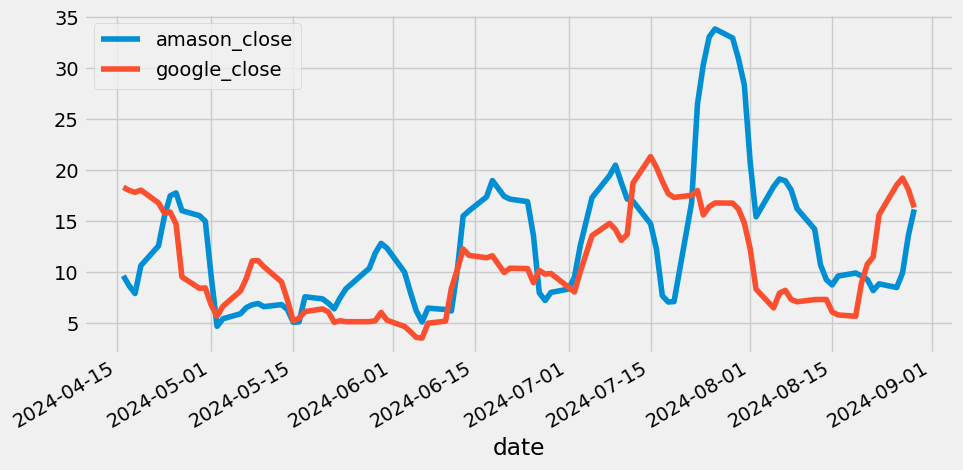

In [59]:
# Определяем рассматриваемый период как число
# Вычисляем волатильность
min_period = 10
vol = df.rolling(min_period).std() * np.sqrt(min_period)

# Строим график
vol[['amason_close', 'google_close']].plot()

plt.show()

In [60]:
vol

,amason_close,roll_mean_2,expand_mean,roll_mean_3,prev_price,daily_return,positive,num_positive,google_close
date,,,,,,,,,
2024-09-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-04-22,12.557638,12.609307,0.459037,12.980654,15.416409,0.069696,1.527525,3.785939,16.772948
2024-04-19,10.623875,9.823544,0.505963,10.169136,12.557638,0.069887,1.527525,4.000000,18.026845
2024-04-18,7.883178,6.369851,0.505976,6.304539,10.623875,0.076975,1.632993,4.422166,17.808737


## Применение библиотеки tsfresh для работы со скользящим окном

In [61]:
# установка дополнительной библиотеки
!pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 12.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [63]:
# extract_features - извлечь все признаки, extract_relevant_features - извлечь релевантные признаки
# select_features рассчитывает важность текущего признака для предсказания класса
from tsfresh import extract_features, extract_relevant_features, select_features

from tsfresh.utilities.dataframe_functions import impute # заполнить пропуски, удалите все значения NaN
from tsfresh.utilities.dataframe_functions import roll_time_series # скользящее окно по данным


### Работа со скользящим окном

Окно по всему фрейму данных

Tsfresh предоставляет полезный метод, который генерирует для нас новый фрейм данных. Этот метод генерирует новый идентификатор, который является кортежем из

а) созданного нами идентификатора и

б) максимального date_block_num, учитываемого в окне.

In [66]:
# Акции GOOGLE, Apple, Tesla на бирже stooq
# Подробнее https://www.quantstart.com/articles/an-introduction-to-stooq-pricing-data/
COMPANY_STOCKS_FORTH_NAME = "TSLA"
COMPANY_STOCKS_THIRD_NAME = "AAPL"
COMPANY_STOCKS_SECOND_NAME = "GOOGL"
STOCKS_SOURCE = 'stooq'
df_all = web.DataReader(COMPANY_STOCKS_FORTH_NAME, STOCKS_SOURCE, start, end)['High']
df_all.tail()

,High
Date,
2024-04-22,144.44
2024-04-19,150.94
2024-04-18,152.20
2024-04-17,158.33
2024-04-16,158.19


In [67]:
df_all

,High
Date,
2024-09-12,231.45
2024-09-11,228.47
2024-09-10,226.40
2024-09-09,219.87
2024-09-06,233.60
...,...
2024-04-22,144.44
2024-04-19,150.94
2024-04-18,152.20


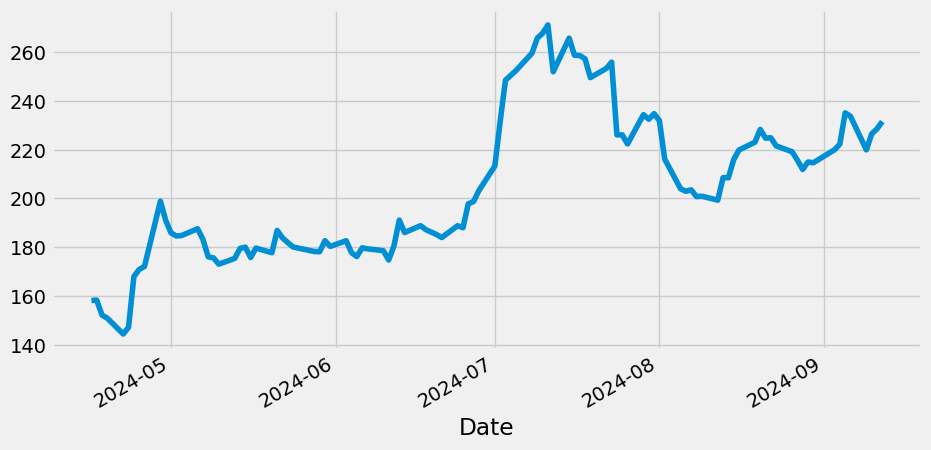

In [68]:
df_all.plot(ax=plt.gca())
plt.show()

In [69]:
# сделать временную зависимость более понятной и добавить идентификатор к каждой стоимости акций
df_melted = pd.DataFrame({f"High_{COMPANY_STOCKS_FORTH_NAME}": df_all.copy()})
df_melted["date"] = df_melted.index
df_melted["Symbols"] = COMPANY_STOCKS_FORTH_NAME

df_melted.head()

,High_TSLA,date,Symbols
Date,,,
2024-09-12,231.45,2024-09-12,TSLA
2024-09-11,228.47,2024-09-11,TSLA
2024-09-10,226.40,2024-09-10,TSLA
2024-09-09,219.87,2024-09-09,TSLA
2024-09-06,233.60,2024-09-06,TSLA


tuple(High_TSLA, date, Symbols) - отправили в библиотеку

tuple(Symbols, date) - идентификатор результата

In [70]:
'''
Прогнозы обычно включают в себя следующие этапы:
- Собрать данные
- Feature extraction
- Прогнозирование (следующая лекция)

Результаты тестирования используются в качестве прогноза на будущий период

Процесс скольжения окна реализован в функции ROLL_TIME_SERIES.
Размер окна будет равен 20 (максимум 20 дней в прошлом), игнорируем все окна короче 5 дней.

Сгенерированные фреймы данных теперь состоят из этих "окон", выделенных из исходного фрейма данных
'''
df_rolled = roll_time_series(df_melted, column_id="Symbols", column_sort="date",
                             max_timeshift=14, min_timeshift=2)

/usr/local/lib/python3.10/dist-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(
Rolling: 100%|██████████| 104/104 [00:00<00:00, 583.95it/s]


In [71]:
df_rolled.head()

,High_TSLA,date,Symbols,id
0,158.19,2024-04-16,TSLA,"(TSLA, 2024-04-18 00:00:00)"
1,158.33,2024-04-17,TSLA,"(TSLA, 2024-04-18 00:00:00)"
2,152.20,2024-04-18,TSLA,"(TSLA, 2024-04-18 00:00:00)"
3,158.19,2024-04-16,TSLA,"(TSLA, 2024-04-19 00:00:00)"
4,158.33,2024-04-17,TSLA,"(TSLA, 2024-04-19 00:00:00)"


In [72]:
df_rolled.dtypes

,0
High_TSLA,float64
date,datetime64[ns]
Symbols,object
id,object


In [73]:
df_rolled.describe(include={'datetime64[ns]', 'float64'})

,High_TSLA,date
count,1452.000000,1452
mean,203.158093,2024-06-24 10:35:42.148760064
min,144.440000,2024-04-16 00:00:00
25%,179.730000,2024-05-20 00:00:00
50%,197.755000,2024-06-25 00:00:00
75%,224.659400,2024-07-30 00:00:00
max,271.000000,2024-09-12 00:00:00
std,30.727715,NaN


In [78]:
df_rolled[df_rolled["id"] == (COMPANY_STOCKS_FORTH_NAME, pd.to_datetime("2024-08-20"))]

,High_TSLA,date,Symbols,id
1197,234.6800,2024-07-31,TSLA,"(TSLA, 2024-08-20 00:00:00)"
1198,231.8670,2024-08-01,TSLA,"(TSLA, 2024-08-20 00:00:00)"
1199,216.1300,2024-08-02,TSLA,"(TSLA, 2024-08-20 00:00:00)"
1200,203.8799,2024-08-05,TSLA,"(TSLA, 2024-08-20 00:00:00)"
1201,202.9000,2024-08-06,TSLA,"(TSLA, 2024-08-20 00:00:00)"
1202,203.4900,2024-08-07,TSLA,"(TSLA, 2024-08-20 00:00:00)"
1203,200.7000,2024-08-08,TSLA,"(TSLA, 2024-08-20 00:00:00)"
1204,200.8800,2024-08-09,TSLA,"(TSLA, 2024-08-20 00:00:00)"
1205,199.2600,2024-08-12,TSLA,"(TSLA, 2024-08-20 00:00:00)"
1206,208.4900,2024-08-13,TSLA,"(TSLA, 2024-08-20 00:00:00)"


In [79]:
df_melted[(df_melted["date"] <= pd.to_datetime("2024-08-20")) &
          (df_melted["date"] >= pd.to_datetime("2024-07-21")) &
          (df_melted["Symbols"] == COMPANY_STOCKS_FORTH_NAME)]

,High_TSLA,date,Symbols
Date,,,
2024-08-20,228.2200,2024-08-20,TSLA
2024-08-19,222.9800,2024-08-19,TSLA
2024-08-16,219.8000,2024-08-16,TSLA
2024-08-15,215.8800,2024-08-15,TSLA
2024-08-14,208.4400,2024-08-14,TSLA
2024-08-13,208.4900,2024-08-13,TSLA
2024-08-12,199.2600,2024-08-12,TSLA
2024-08-09,200.8800,2024-08-09,TSLA
2024-08-08,200.7000,2024-08-08,TSLA


In [80]:
len(df_melted)

104

In [81]:
df_rolled["id"].nunique() # количество окон в данных

102

In [82]:
df_rolled.groupby("id").size().agg([Series.min, Series.max])

,0
min,3
max,15


In [83]:
df_melted

,High_TSLA,date,Symbols
Date,,,
2024-09-12,231.45,2024-09-12,TSLA
2024-09-11,228.47,2024-09-11,TSLA
2024-09-10,226.40,2024-09-10,TSLA
2024-09-09,219.87,2024-09-09,TSLA
2024-09-06,233.60,2024-09-06,TSLA
...,...,...,...
2024-04-22,144.44,2024-04-22,TSLA
2024-04-19,150.94,2024-04-19,TSLA
2024-04-18,152.20,2024-04-18,TSLA


In [84]:
# Сравним с pandas
# Сдвиг окна на последние 100 дней (осторожно! в обычном случае брать не более 12)
df_melted['roll_mean_15'] = df_melted['High_TSLA'].rolling(15).mean()
df_melted.head(20)

,High_TSLA,date,Symbols,roll_mean_15
Date,,,,
2024-09-12,231.4500,2024-09-12,TSLA,NaN
2024-09-11,228.4700,2024-09-11,TSLA,NaN
2024-09-10,226.4000,2024-09-10,TSLA,NaN
2024-09-09,219.8700,2024-09-09,TSLA,NaN
2024-09-06,233.6000,2024-09-06,TSLA,NaN
2024-09-05,235.0000,2024-09-05,TSLA,NaN
2024-09-04,222.2200,2024-09-04,TSLA,NaN
2024-09-03,219.9043,2024-09-03,TSLA,NaN
2024-08-30,214.5701,2024-08-30,TSLA,NaN


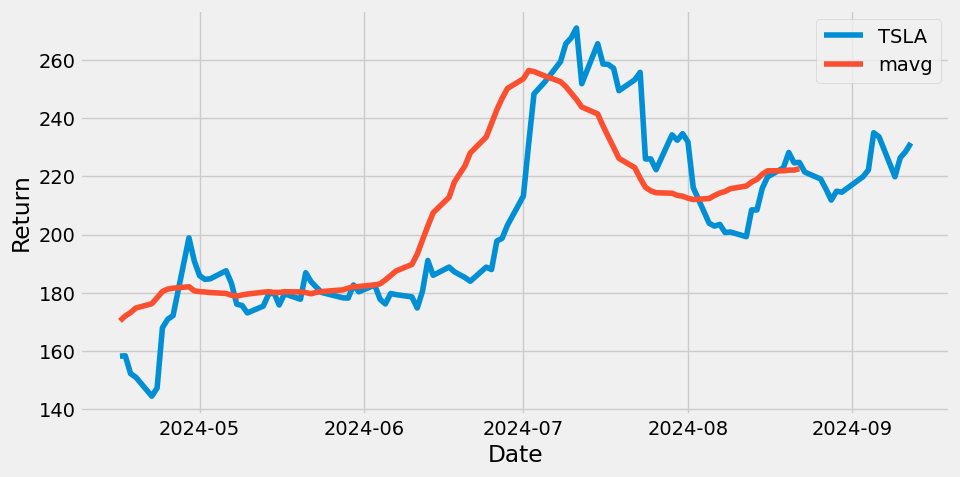

In [85]:
plt.plot(df_melted['High_TSLA'], label=COMPANY_STOCKS_FORTH_NAME)
plt.plot(df_melted['roll_mean_15'], label='mavg')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

## Работа с TSFresh с компанием apple

In [86]:
# Акции GOOGLE, Apple, Tesla на бирже stooq
# Подробнее https://www.quantstart.com/articles/an-introduction-to-stooq-pricing-data/
COMPANY_STOCKS_FORTH_NAME = "TSLA"
COMPANY_STOCKS_THIRD_NAME = "AAPL"
COMPANY_STOCKS_SECOND_NAME = "GOOGL"
STOCKS_SOURCE = 'stooq'
df_all = web.DataReader(COMPANY_STOCKS_THIRD_NAME, STOCKS_SOURCE, start, end)['High']
df_all.tail()

,High
Date,
2024-04-22,167.26
2024-04-19,166.40
2024-04-18,168.64
2024-04-17,170.65
2024-04-16,173.76


In [87]:
df_all

,High
Date,
2024-09-12,223.55
2024-09-11,223.09
2024-09-10,221.48
2024-09-09,221.27
2024-09-06,225.24
...,...
2024-04-22,167.26
2024-04-19,166.40
2024-04-18,168.64


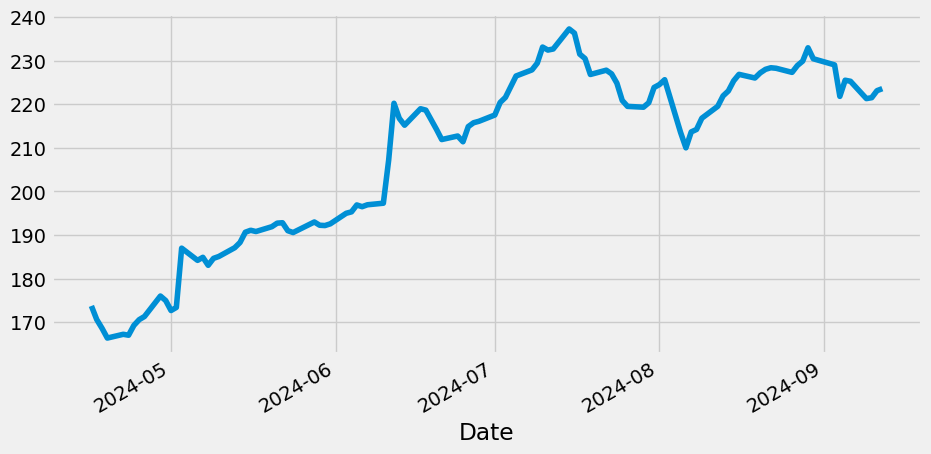

In [88]:
df_all.plot(ax=plt.gca())
plt.show()

In [97]:
# сделать временную зависимость более понятной и добавить идентификатор к каждой стоимости акций
df_melted_AAPL = pd.DataFrame({f"High_{COMPANY_STOCKS_THIRD_NAME}": df_all.copy()})
df_melted_AAPL["date"] = df_melted_AAPL.index
df_melted_AAPL["Symbols"] = COMPANY_STOCKS_THIRD_NAME

df_melted_AAPL.head()

,High_AAPL,date,Symbols
Date,,,
2024-09-12,223.55,2024-09-12,AAPL
2024-09-11,223.09,2024-09-11,AAPL
2024-09-10,221.48,2024-09-10,AAPL
2024-09-09,221.27,2024-09-09,AAPL
2024-09-06,225.24,2024-09-06,AAPL


tuple(High_TSLA, date, Symbols) - отправили в библиотеку

tuple(Symbols, date) - идентификатор результата

In [99]:
'''
Прогнозы обычно включают в себя следующие этапы:
- Собрать данные
- Feature extraction
- Прогнозирование (следующая лекция)

Результаты тестирования используются в качестве прогноза на будущий период

Процесс скольжения окна реализован в функции ROLL_TIME_SERIES.
Размер окна будет равен 20 (максимум 20 дней в прошлом), игнорируем все окна короче 5 дней.

Сгенерированные фреймы данных теперь состоят из этих "окон", выделенных из исходного фрейма данных
'''
df_rolled_AAPL = roll_time_series(df_melted_AAPL, column_id="Symbols", column_sort="date", max_timeshift=14, min_timeshift=2)

/usr/local/lib/python3.10/dist-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(
Rolling: 100%|██████████| 104/104 [00:00<00:00, 534.06it/s]


In [100]:
df_rolled_AAPL.head(40)

,High_AAPL,date,Symbols,id
0,173.76,2024-04-16,AAPL,"(AAPL, 2024-04-18 00:00:00)"
1,170.65,2024-04-17,AAPL,"(AAPL, 2024-04-18 00:00:00)"
2,168.64,2024-04-18,AAPL,"(AAPL, 2024-04-18 00:00:00)"
3,173.76,2024-04-16,AAPL,"(AAPL, 2024-04-19 00:00:00)"
4,170.65,2024-04-17,AAPL,"(AAPL, 2024-04-19 00:00:00)"
5,168.64,2024-04-18,AAPL,"(AAPL, 2024-04-19 00:00:00)"
6,166.40,2024-04-19,AAPL,"(AAPL, 2024-04-19 00:00:00)"
7,173.76,2024-04-16,AAPL,"(AAPL, 2024-04-22 00:00:00)"
8,170.65,2024-04-17,AAPL,"(AAPL, 2024-04-22 00:00:00)"
9,168.64,2024-04-18,AAPL,"(AAPL, 2024-04-22 00:00:00)"


In [101]:
df_rolled_AAPL.dtypes

,0
High_AAPL,float64
date,datetime64[ns]
Symbols,object
id,object


In [102]:
df_rolled_AAPL.describe(include={'datetime64[ns]', 'float64'})

,High_AAPL,date
count,1452.000000,1452
mean,207.337291,2024-06-24 10:35:42.148760064
min,166.400000,2024-04-16 00:00:00
25%,191.000000,2024-05-20 00:00:00
50%,214.860000,2024-06-25 00:00:00
75%,225.480000,2024-07-30 00:00:00
max,237.230000,2024-09-12 00:00:00
std,20.620020,NaN


In [104]:
df_rolled_AAPL[df_rolled_AAPL["id"] == (COMPANY_STOCKS_THIRD_NAME, pd.to_datetime("2024-07-01"))]

,High_AAPL,date,Symbols,id
672,197.3000,2024-06-10,AAPL,"(AAPL, 2024-07-01 00:00:00)"
673,207.1600,2024-06-11,AAPL,"(AAPL, 2024-07-01 00:00:00)"
674,220.2000,2024-06-12,AAPL,"(AAPL, 2024-07-01 00:00:00)"
675,216.7500,2024-06-13,AAPL,"(AAPL, 2024-07-01 00:00:00)"
676,215.1700,2024-06-14,AAPL,"(AAPL, 2024-07-01 00:00:00)"
677,218.9500,2024-06-17,AAPL,"(AAPL, 2024-07-01 00:00:00)"
678,218.6300,2024-06-18,AAPL,"(AAPL, 2024-07-01 00:00:00)"
679,214.2400,2024-06-20,AAPL,"(AAPL, 2024-07-01 00:00:00)"
680,211.8900,2024-06-21,AAPL,"(AAPL, 2024-07-01 00:00:00)"
681,212.7000,2024-06-24,AAPL,"(AAPL, 2024-07-01 00:00:00)"


In [105]:
df_melted_AAPL[(df_melted_AAPL["date"] <= pd.to_datetime("2024-08-01")) &
          (df_melted_AAPL["date"] >= pd.to_datetime("2024-07-02")) &
          (df_melted_AAPL["Symbols"] == COMPANY_STOCKS_THIRD_NAME)]

,High_AAPL,date,Symbols
Date,,,
2024-08-01,224.4800,2024-08-01,AAPL
2024-07-31,223.8200,2024-07-31,AAPL
2024-07-30,220.3250,2024-07-30,AAPL
2024-07-29,219.3000,2024-07-29,AAPL
2024-07-26,219.4900,2024-07-26,AAPL
2024-07-25,220.8500,2024-07-25,AAPL
2024-07-24,224.8000,2024-07-24,AAPL
2024-07-23,226.9400,2024-07-23,AAPL
2024-07-22,227.7800,2024-07-22,AAPL


In [106]:
len(df_melted_AAPL)

104

In [107]:
df_rolled_AAPL["id"].nunique() # количество окон в данных

102

In [108]:
df_rolled_AAPL.groupby("id").size().agg([Series.min, Series.max])

,0
min,3
max,15


In [109]:
df_melted_AAPL

,High_AAPL,date,Symbols
Date,,,
2024-09-12,223.55,2024-09-12,AAPL
2024-09-11,223.09,2024-09-11,AAPL
2024-09-10,221.48,2024-09-10,AAPL
2024-09-09,221.27,2024-09-09,AAPL
2024-09-06,225.24,2024-09-06,AAPL
...,...,...,...
2024-04-22,167.26,2024-04-22,AAPL
2024-04-19,166.40,2024-04-19,AAPL
2024-04-18,168.64,2024-04-18,AAPL


In [111]:
# Сравним с pandas
# Сдвиг окна на последние 100 дней (осторожно! в обычном случае брать не более 12)
df_melted_AAPL['roll_mean_12'] = df_melted_AAPL['High_AAPL'].rolling(12).mean()
df_melted_AAPL.head(20)

,High_AAPL,date,Symbols,roll_mean_12
Date,,,,
2024-09-12,223.5500,2024-09-12,AAPL,NaN
2024-09-11,223.0900,2024-09-11,AAPL,NaN
2024-09-10,221.4800,2024-09-10,AAPL,NaN
2024-09-09,221.2700,2024-09-09,AAPL,NaN
2024-09-06,225.2400,2024-09-06,AAPL,NaN
2024-09-05,225.4800,2024-09-05,AAPL,NaN
2024-09-04,221.7800,2024-09-04,AAPL,NaN
2024-09-03,229.0000,2024-09-03,AAPL,NaN
2024-08-30,230.4000,2024-08-30,AAPL,NaN


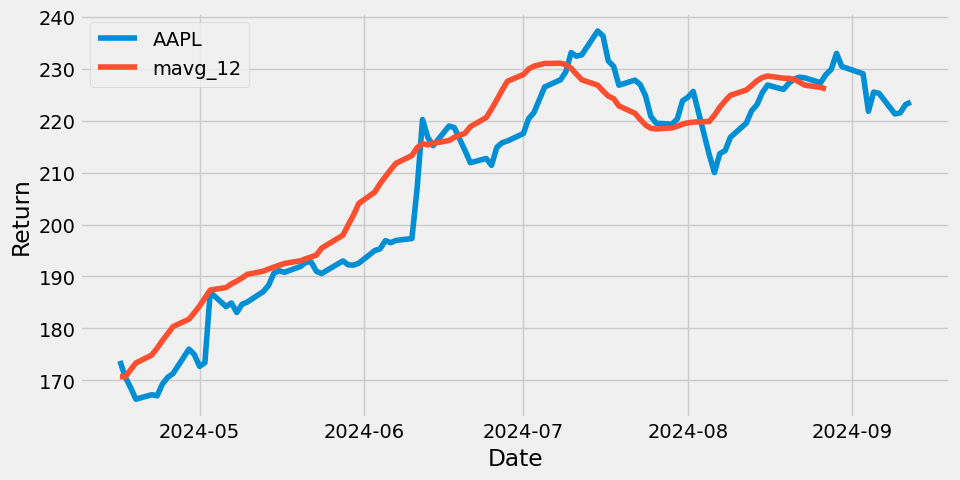

In [112]:
plt.plot(df_melted_AAPL['High_AAPL'], label=COMPANY_STOCKS_THIRD_NAME)
plt.plot(df_melted_AAPL['roll_mean_12'], label='mavg_12')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()